In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Mall_Customers.csv')
print(df.head(5))
print(df.shape)
print(df.dtypes)
df1=df.drop(['CustomerID','Gender'],axis=1)
print(df1.head(5))

X_scaled=StandardScaler().fit_transform(df1)
print(X_scaled.shape)
print(X_scaled.mean())

k_means=KMeans(n_clusters=3,random_state=42)
clusters=k_means.fit_predict(X_scaled)
df1['Clusters']=clusters
df1

print(f'Clusters with 0:\n\n {df1[df1['Clusters']==0].mean()}') #Older, low-spending customers
print(f'Clusters with 1:\n\n {df1[df1['Clusters']==1].mean()}') #High-income, high-spending customers
print(f'Clusters with 2:\n\n {df1[df1['Clusters']==2].mean()}') #Young, budget-conscious spenders

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
   Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40
(200, 3)
-7.105427357601002e-17
Clusters with 0:

 Age                       50.

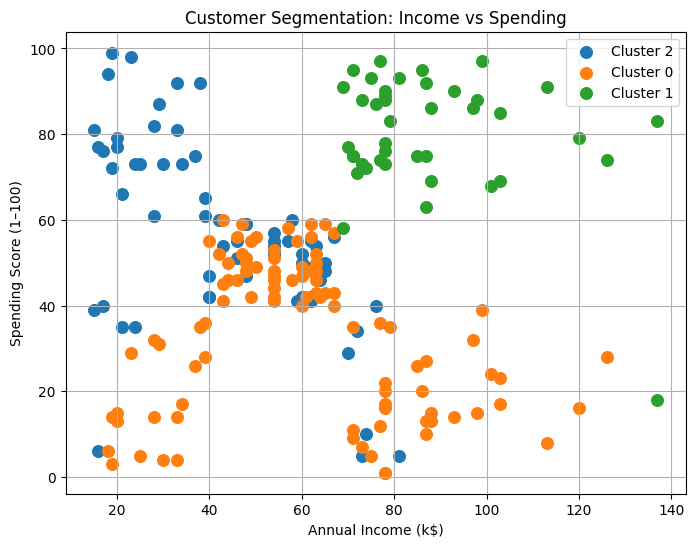

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for cluster in df1['Clusters'].unique():
    subset = df1[df1['Clusters'] == cluster]
    plt.scatter(
        subset['Annual Income (k$)'],
        subset['Spending Score (1-100)'],
        label=f'Cluster {cluster}',
        s=70
    )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.title("Customer Segmentation: Income vs Spending")
plt.legend()
plt.grid(True)
plt.show()


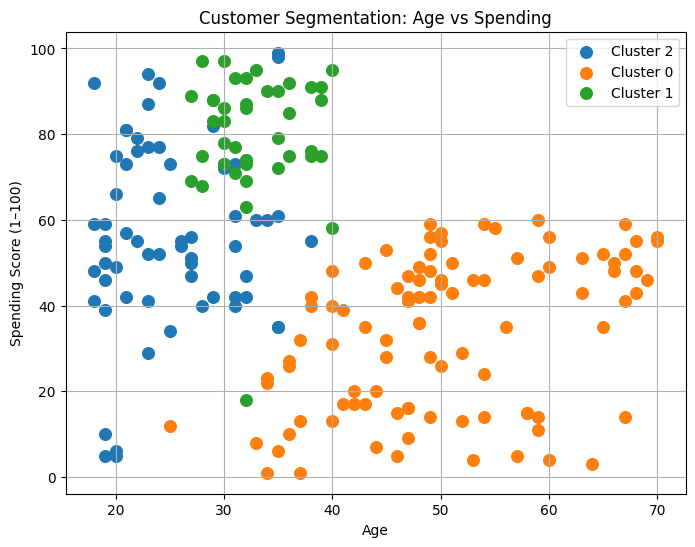

In [31]:
plt.figure(figsize=(8,6))

for cluster in df1['Clusters'].unique():
    subset = df1[df1['Clusters'] == cluster]
    plt.scatter(
        subset['Age'],
        subset['Spending Score (1-100)'],
        label=f'Cluster {cluster}',
        s=70
    )

plt.xlabel("Age")
plt.ylabel("Spending Score (1–100)")
plt.title("Customer Segmentation: Age vs Spending")
plt.legend()
plt.grid(True)
plt.show()


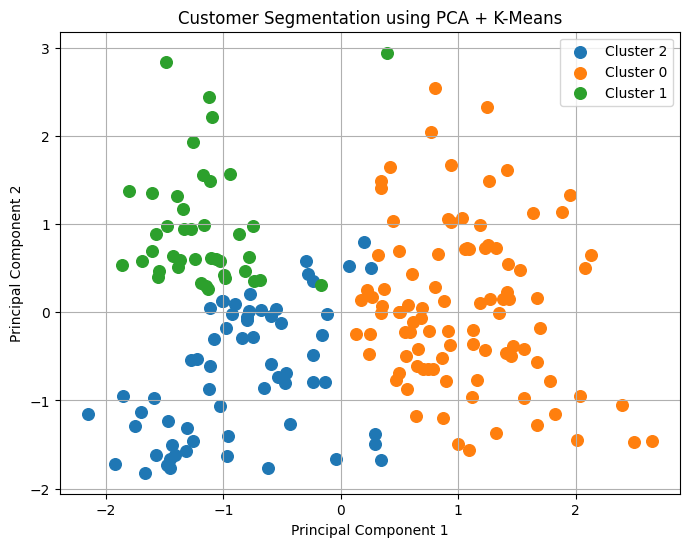

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))

for cluster in df1['Clusters'].unique():
    plt.scatter(
        X_pca[df1['Clusters'] == cluster, 0],
        X_pca[df1['Clusters'] == cluster, 1],
        label=f'Cluster {cluster}',
        s=70
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using PCA + K-Means")
plt.legend()
plt.grid(True)
plt.show()
